In [2]:
import pandas as pd
#import quandl
import math, datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

In [5]:
#df = quandl.get('WIKI/GOOGL')
df = pd.read_csv('BTC-USD.csv')
print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  


In [6]:
df = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
df['HL_PCT'] = (df['High'] - df['Adj Close']) / df['Adj Close'] * 100
df['PCT_change'] = (df['Adj Close'] - df['Open']) / df['Open'] * 100

<ipython-input-6-626f7051e407>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HL_PCT'] = (df['High'] - df['Adj Close']) / df['Adj Close'] * 100


In [7]:
df = df[['Adj Close', 'HL_PCT', 'PCT_change', 'Volume']]

In [8]:
print(df.head())

    Adj Close    HL_PCT  PCT_change    Volume
0  457.334015  2.370258   -1.831006  21056800
1  424.440002  7.638296   -7.096262  34483200
2  394.795990  8.368626   -6.910351  37919700
3  408.903992  3.519652    3.605767  36863600
4  398.821014  3.411300   -2.270110  26580100


In [9]:
forecast_col = 'Adj Close'
df.fillna(-99999, inplace=True)

In [10]:
forecast_out = int(math.ceil(0.0001*len(df)))
print(forecast_out)

1


In [11]:
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
print(df.head())

    Adj Close    HL_PCT  PCT_change    Volume       label
0  457.334015  2.370258   -1.831006  21056800  424.440002
1  424.440002  7.638296   -7.096262  34483200  394.795990
2  394.795990  8.368626   -6.910351  37919700  408.903992
3  408.903992  3.519652    3.605767  36863600  398.821014
4  398.821014  3.411300   -2.270110  26580100  402.152008


In [12]:
x = np.array(df.drop(['label'],1))
y = np.array(df['label'])


<ipython-input-12-7755bd0c6689>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop(['label'],1))


In [13]:
x = preprocessing.scale(x)
x_lately = x[-forecast_out:]
y = np.array(df['label'])
print(len(x), len(y))

3219 3219


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
clf = LinearRegression(n_jobs=-1)
clf.fit(x_train, y_train)
acc = clf.score(x_test, y_test)
print(acc)

0.9983452544831279


In [16]:
forecast_set = clf.predict(x_lately)
print(forecast_set, acc, forecast_out )

[30330.60503542] 0.9983452544831279 1


In [ ]:
style.use('ggplot')
df = pd.read_csv('BTC-USD.csv', index_col='Date', parse_dates=True)
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [ ]:
for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

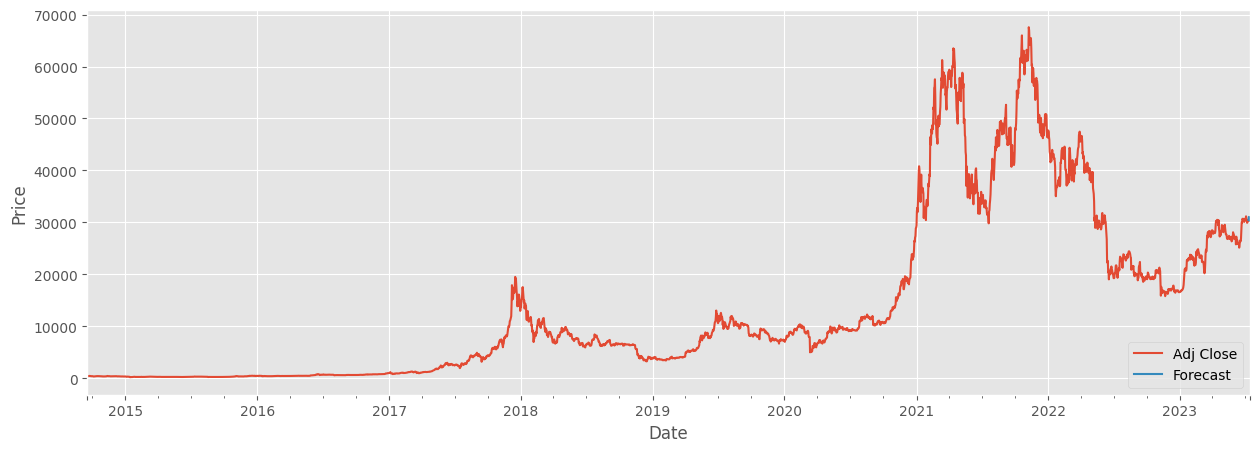

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,5

df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()